<a href="https://colab.research.google.com/github/Hanna07111/news-popularity-project/blob/main/Decision_Tree_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

### 데이터 불러오기

In [ ]:
#train 데이터
df = pd.read_csv("/content/drive/MyDrive/25-1 패턴인식 프로젝트/train_processed.csv")
df.head()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,channel_World,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,shares,y
0,17335,9.0,409.0,0.501326,1.0,0.587361,3.178054,1.098612,2.484907,0.000000,...,False,False,False,False,False,False,False,False,801,0
1,21242,10.0,317.0,0.725086,1.0,0.830097,1.945910,1.386294,0.693147,3.091042,...,False,False,True,False,False,False,False,False,426,0
2,9448,11.0,447.0,0.584091,1.0,0.730104,2.079442,0.693147,0.693147,0.693147,...,True,False,False,False,False,True,False,False,2400,1
3,36797,13.0,143.0,0.638298,1.0,0.787500,1.386294,1.098612,0.693147,0.000000,...,False,False,False,False,False,False,False,False,1100,0
4,29504,17.0,576.0,0.524412,1.0,0.714286,2.197225,1.386294,0.693147,0.000000,...,True,False,False,True,False,False,False,False,1500,1


### feature, target 분리

In [ ]:
X = df.drop(['id','shares','y'], axis=1)
y = df['y']

### Train-validation split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Decision tree 모델 학습 & 예측 및 평가
- GridSearchCV -> 최적의 파라미터 찾기

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# 모델 정의
dt = DecisionTreeClassifier(random_state=42)

# GridSearchCV 실행
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # 모든 CPU 코어 사용
    verbose=1
)

# 학습
grid_search.fit(X_train, y_train)

# 결과 출력
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.6197635135135136


- 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2

In [ ]:
dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# 예측
y_pred = dt.predict(X_val)

# 평가
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.6213963963963964
              precision    recall  f1-score   support

           0       0.63      0.62      0.62      2239
           1       0.62      0.62      0.62      2201

    accuracy                           0.62      4440
   macro avg       0.62      0.62      0.62      4440
weighted avg       0.62      0.62      0.62      4440



### Decision Tree 시각화

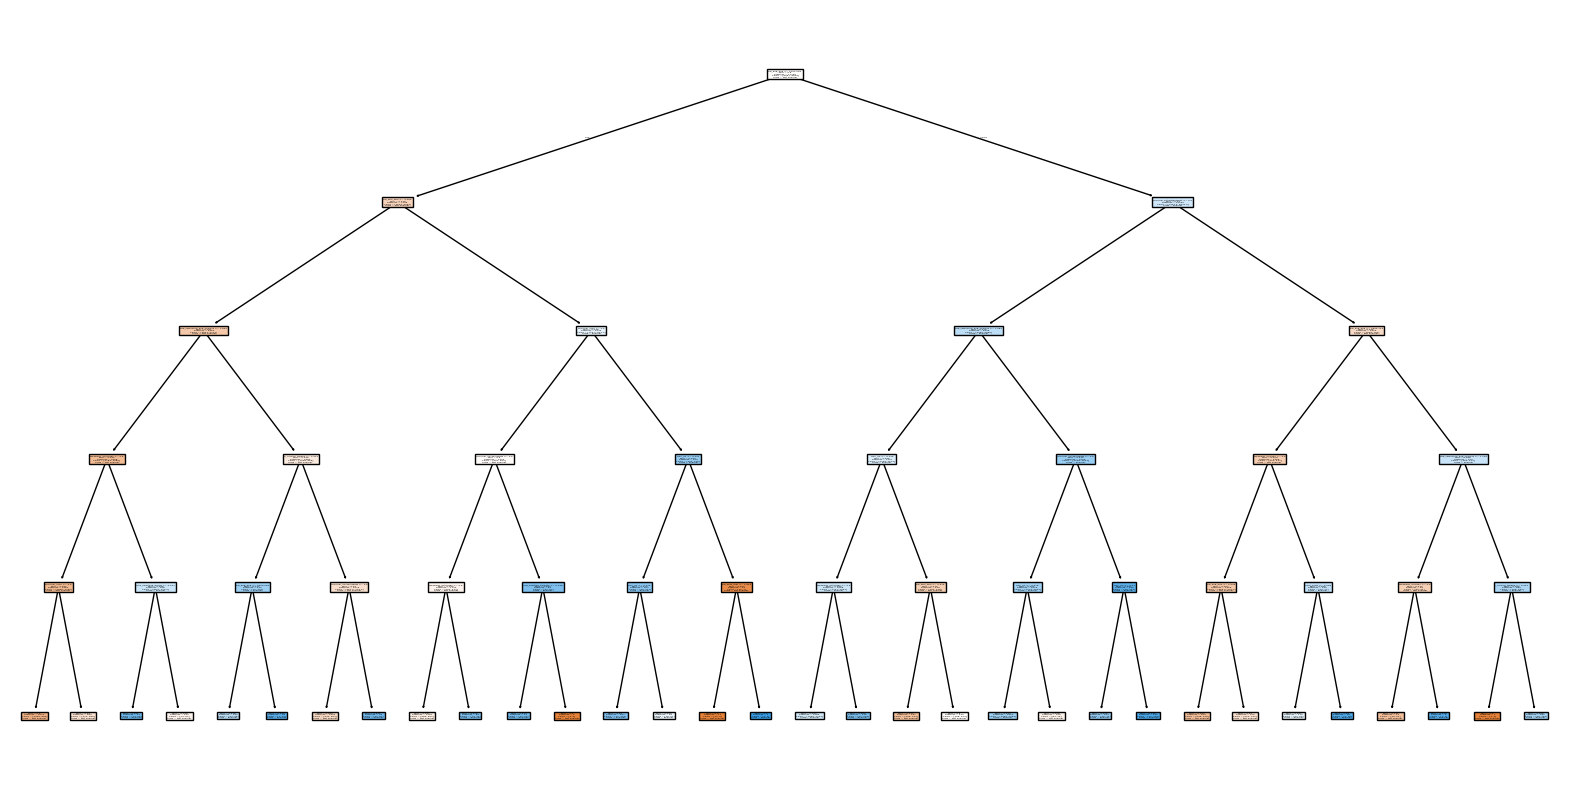

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['Not Popular', 'Popular'], filled=True)
plt.show()

### feature 중요도 시각화

                         feature  importance
20                    kw_avg_avg    0.326140
23    self_reference_avg_sharess    0.134168
46         channel_Entertainment    0.116695
12                    kw_min_min    0.089903
56              weekday_Saturday    0.065304
26                        LDA_02    0.058874
48          channel_Social Media    0.058500
49                  channel_Tech    0.049687
3                n_unique_tokens    0.029813
57                weekday_Sunday    0.019940
25                        LDA_01    0.013472
34           rate_negative_words    0.010157
24                        LDA_00    0.008095
14                    kw_avg_min    0.007005
35         avg_positive_polarity    0.005175
6                      num_hrefs    0.005016
13                    kw_max_min    0.002055
11                  num_keywords    0.000000
9                     num_videos    0.000000
8                       num_imgs    0.000000
7                 num_self_hrefs    0.000000
5       n_

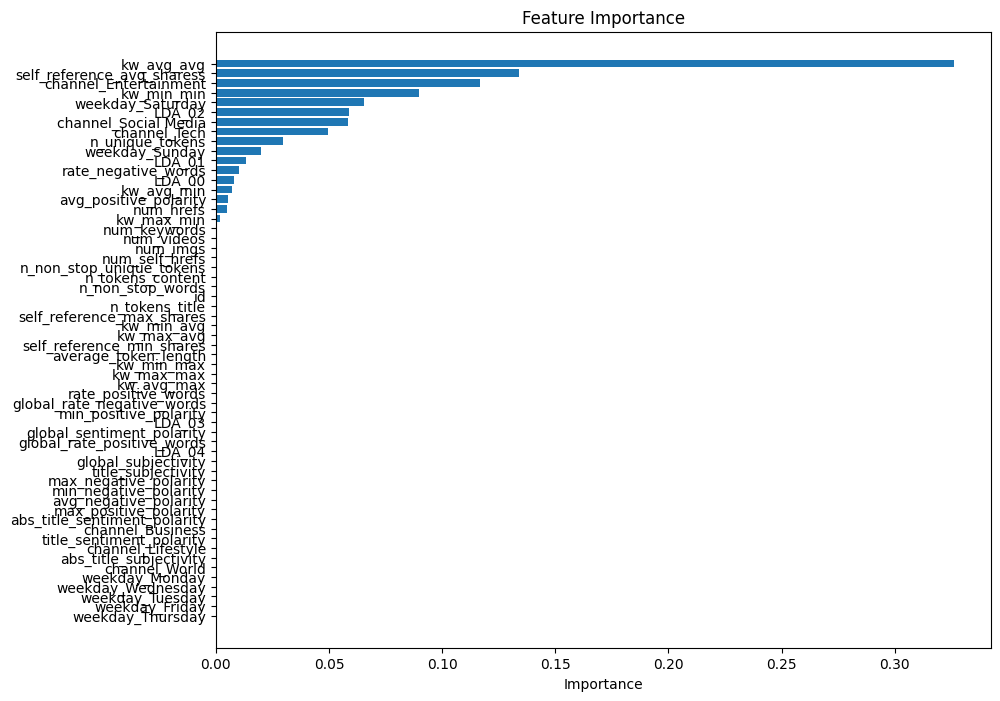

In [ ]:
importances = dt.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10,8))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()